In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def pencil_sketch(image_path, blur_kernel=21):
    """converts an image to a pencil sketch."""
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at {image_path}")
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # invert the grayscale image
    inv_gray = 255 - gray
    # Apply Gaussian blur
    img_blur = cv2.GaussianBlur(inv_gray, (blur_kernel, blur_kernel), 0)
    # Invert the blurred image
    inv_blur = 255 - img_blur
    # Create the pencil sketch image
    sketch = cv2.divide(gray, inv_blur, scale=255)

    #contrast to sketch
    sketch = cv2.normalize(sketch, None, alpha=0, beta=100, norm_type=cv2.NORM_MINMAX)

    #increase brightness
    sketch = cv2.convertScaleAbs(sketch, alpha=1, beta=50)
    return sketch,img

def display_sketch(original, sketch, save_path=None):
    """Displays the original and sketch images side by side."""
    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Pencil Sketch')
    plt.imshow(sketch, cmap='gray')
    plt.axis('off')
    plt.show()
    if save_path:
        cv2.imwrite(save_path, sketch)
        print(f"Sketch saved to {save_path}")


def main(image_path, blur_kernel=21, save_path=None):
    """Executes the pencil sketch conversion and displays the result."""   
    sketch, img = pencil_sketch(image_path, blur_kernel=blur_kernel)
    display_sketch(img, sketch, save_path = save_path)

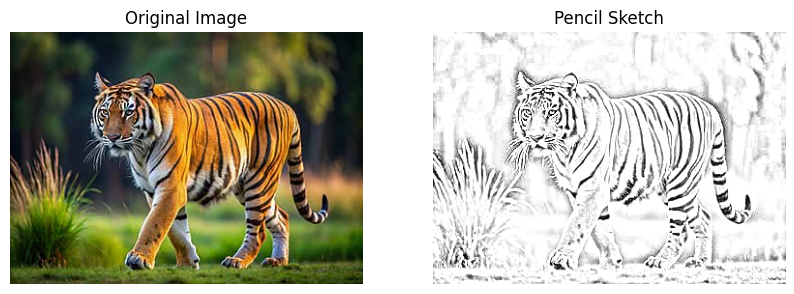

Sketch saved to C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\sketch1.jpg


In [3]:
main(r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\test1.jpg', blur_kernel=21, save_path=r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\sketch1.jpg')

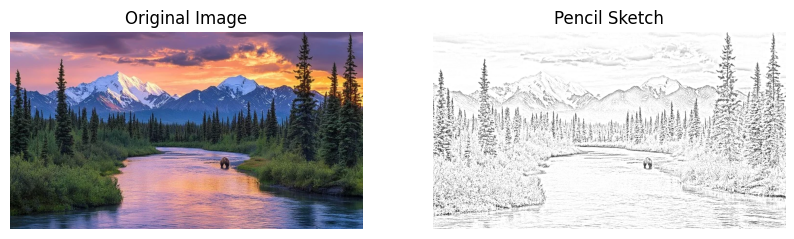

Sketch saved to C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\sketch2.jpg


In [4]:
main(r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\test2.jpg', blur_kernel=21, save_path=r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\sketch2.jpg')

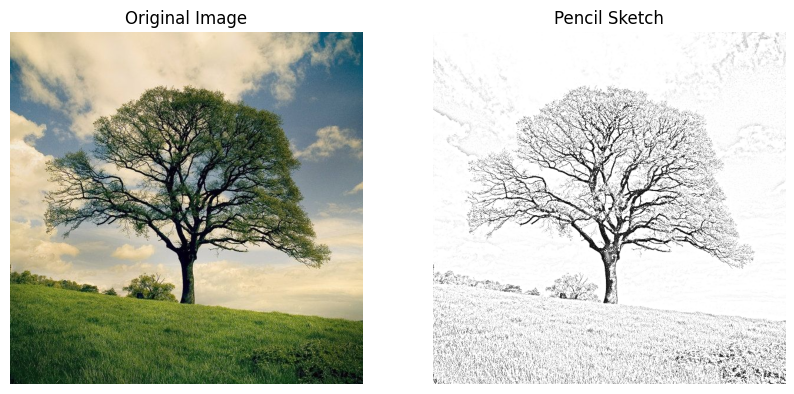

Sketch saved to C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\sketch3.jpg


In [5]:
main(r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\test3.jpg', blur_kernel=21, save_path=r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\sketch3.jpg')

In [ ]:
#video sketching
def video_pencil_sketch(vid_path, blur_kernel=21):
    """Converts webcam video feed to pencil sketch in real-time."""
    cap = cv2.VideoCapture(vid_path)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        sketch, _ = pencil_sketch_from_frame(frame, blur_kernel)
        cv2.imshow('Pencil Sketch', sketch)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
def pencil_sketch_from_frame(frame, blur_kernel=21):
    """Converts a single frame to pencil sketch."""
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    inv_gray = 255 - gray
    img_blur = cv2.GaussianBlur(inv_gray, (blur_kernel, blur_kernel), 0)
    inv_blur = 255 - img_blur
    sketch = cv2.divide(gray, inv_blur, scale=255)
    sketch = cv2.normalize(sketch, None, alpha=0, beta=100, norm_type=cv2.NORM_MINMAX)
    sketch = cv2.convertScaleAbs(sketch, alpha=1, beta=50)
    return sketch, frame
video_pencil_sketch(r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\7246228-hd_1280_720_24fps.mp4', blur_kernel=21)

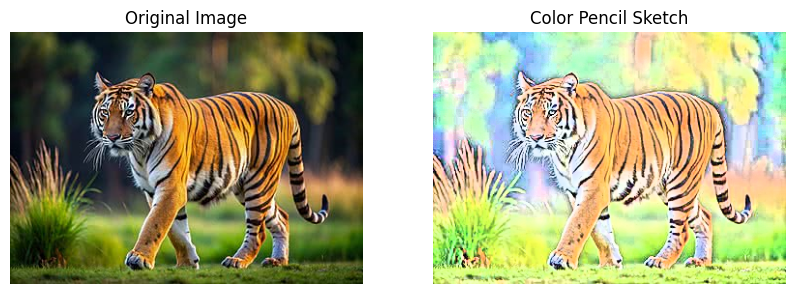

Color sketch saved to C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\color_sketch1.jpg


In [ ]:
#color pencil sketch
def color_pencil_sketch(image_path, blur_kernel=21):
    """Converts an image to a color pencil sketch."""
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at {image_path}")
    # Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    # Invert the V channel
    inv_v = 255 - v
    # Apply Gaussian blur to the inverted V channel
    v_blur = cv2.GaussianBlur(inv_v, (blur_kernel, blur_kernel), 0)
    # Invert the blurred V channel
    inv_v_blur = 255 - v_blur
    # Create the pencil sketch V channel
    sketch_v = cv2.divide(v, inv_v_blur, scale=255)
    # Merge the channels back
    sketch_hsv = cv2.merge([h, s, sketch_v])
    # Adding slight desaturation for better effect
    sketch_hsv[:, :, 1] = cv2.multiply(sketch_hsv[:, :, 1], 0.7)
    # Convert back to BGR color space
    sketch_bgr = cv2.cvtColor(sketch_hsv, cv2.COLOR_HSV2BGR)
    return sketch_bgr, img

def display_color_sketch(original, sketch, save_path=None):
    """Displays the original and color sketch images side by side."""
    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title('Color Pencil Sketch')
    plt.imshow(cv2.cvtColor(sketch, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    if save_path:
        cv2.imwrite(save_path, sketch)
        print(f"Color sketch saved to {save_path}")

def main_color(image_path, blur_kernel=21, save_path=None):
    """Executes the color pencil sketch conversion and displays the result."""   
    sketch, img = color_pencil_sketch(image_path, blur_kernel=blur_kernel)
    display_color_sketch(img, sketch, save_path = save_path)

main_color(r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\TEST_IMAGES\test1.jpg', blur_kernel=21, save_path=r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\color_sketch1.jpg')
    
    

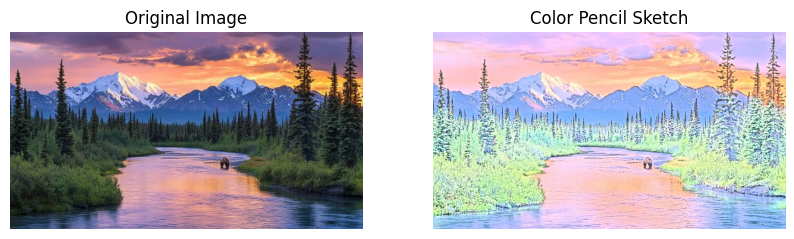

Color sketch saved to C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\color_sketch2.jpg


In [10]:
main_color(r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\TEST_IMAGES\test2.jpg', blur_kernel=21, save_path=r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\color_sketch2.jpg')

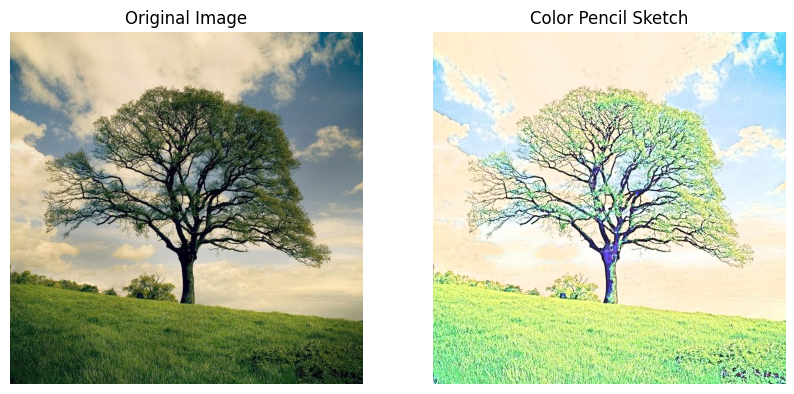

Color sketch saved to C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\color_sketch3.jpg


In [11]:
main_color(r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\TEST_IMAGES\test3.jpg', blur_kernel=21, save_path=r'C:\Users\RIYANSH TRIVEDI\IBOT Tenure 2025-26\myenv\color_sketch3.jpg')